In [4]:
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
from scipy import random
from scipy.io import wavfile
from scipy import fftpack

import IPython

%matplotlib inline

In [5]:
class Signal(object):
    '''A Signal object stored as a sample rate and an array of samples 
    Attributes:
        sample_rate: rate of the sample (integer)
        samples: an array of samples'''
    def __init__(self, sample_rate, samples):
        '''store rate and array as attributes'''
        self.rate = sample_rate
        self.samples = samples
        
        
    def __add__(self, other):
        if self.rate != other.rate:
            raise ValueError("The sample rates have to be the same!")
        new_sample = self.samples + other.samples
        return Signal(self.rate, new_sample)
            
    def plot(self):
        x = np.linspace(0, len(self.samples)/self.rate, len(self.samples)) #Want x axis in seconds
        y = self.samples
        
        plt.subplot(121)
        plt.plot(x,y)
        plt.xlabel("Seconds")

        dft = fftpack.fft(self.samples)
        x_vals = sp.arange(1, len(dft)+1, 1)*1.
        x_vals = x_vals/len(self.samples) * self.rate
        plt.subplot(122)
        plt.plot(x_vals, self.samples)
       
        plt.show()
        
    #copied from Fourier 1 lab     
    def export(self, filename):
        '''Accepts a file name and generates a .wav file from the sample rate and the array of samples'''
            #need to scale if it is out of bounds -32767 and 32767 
            # 32767 / max      then times this by everything in the list
        scale = np.max(np.abs(self.samples))
        sample = (32767 / scale) * self.samples
        samples = sp.int16(sample)
         #function expects an array of 16 bit integers
        wavfile.write(filename, self.rate, samples)

In [6]:
#Problem 1
                         #Noisysignal2.wav
rate, data = wavfile.read('Noisysignal2.wav')

fsig = sp.fft(data, axis=0)

#x = Signal(rate, fsig)
#x.plot()

#remove a range of frequencies with large magnitude
for j in xrange(14500, 55000):
    #set chosen coefficients to 0
    fsig[j] = 0
    fsig[-j] = 0

#y = Signal(rate, fsig)
#y.plot()
#plt.show()

newsig = sp.ifft(fsig)
newsig = sp.real(newsig)
newsig = sp.int16(newsig / sp.absolute(newsig).max() * 32767)

#clean = Signal(rate, newsig)
#clean.export("NewNoisysignal2.wav")


#wavfile.write('Noisysignal2new.wav', self.rate, newsig)
wavfile.write('Newsignal2.wav', rate, newsig)

#clean.plot()
#plt.suptitle("Clean sound")
#plt.show()

In [7]:
IPython.display.Audio("Noisysignal2.wav")

In [8]:
IPython.display.Audio("Newsignal2.wav") 
#it's FDR

In [ ]:
#optional Problem 2
#use balloon.wav
#plot waveform and spectrum of the impulse response

In [25]:
#Problem 3
#read in chopin.wav and the impulse response with wavfile
#add 4 seconds of silence to the signal of chopin.wav
rate, data = wavfile.read("Chopin.wav")
rate2, data2 = wavfile.read("balloon.wav")
b = len(data2)
zero = np.zeros(b)
c = len(data)

#insert 0s in middle of impulse response transform so that 
#it is the same length as chopin.wav
data = np.concatenate((data, zero))
data2 = np.concatenate((data2[:b/2], np.zeros(c), data2[b/2:]))

'''calculate convolution of the signals'''
x = sp.ifft(sp.fft(data)*sp.fft(data2))
x = sp.real(x)
x = sp.int16(x/abs(x).max()*32767)

#calculate Inverse Fourier transform
inv_F = sp.ifft(x)

wavfile.write('concertchopin.wav', rate, x)

IPython.display.Audio("concertchopin.wav")

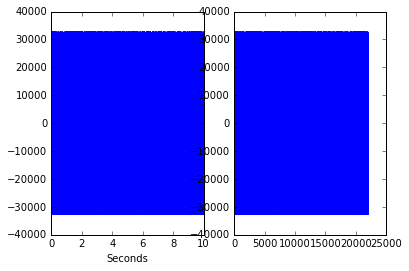

In [29]:
#Problem 4
#create white noise
samplerate = 22002
noise = sp.int16(sp.random.randint(-32767, 32767, samplerate*10))
    #Turn volume down!!!
wavfile.write("white.wav", samplerate, noise)

white_noise = Signal(samplerate, noise)
white_noise.plot()
plt.show()
    
#plot the spectrum of the noise

IPython.display.Audio("white.wav")